## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

 Lab Assignment 2-Alex Campbell 
210001929


Part 1: Python basics

Task 1:

In [2]:
import math

def check_divisibility_by_three(value):
    if value % 3 == 0:
        print(f"{value} is divisible by three.")
    else:
        print(f"{value} is not divisible by three.")
                
#test#
numeric_value= 21
check_divisibility_by_three(numeric_value)
numeric_value= 22
check_divisibility_by_three(numeric_value)

21 is divisible by three.
22 is not divisible by three.


Task 2:

In [3]:
def check_acceptable_fruit(fruit):
    acceptable_fruits = ['apple', 'orange', 'pear', 'kiwi', 'strawberry']
    if fruit.lower() in acceptable_fruits: 
        print(f"{fruit.capitalize()} is acceptable.")
    else:
        print(f"{fruit.capitalize()} is not acceptable.")
        
    #Test#
fruit_input = 'apple'
check_acceptable_fruit(fruit_input)
fruit_input = 'plum'
check_acceptable_fruit(fruit_input)

Apple is acceptable.
Plum is not acceptable.


Task 3:

In [4]:
import math as m

def haversine_distance(coord1, coord2):
    
    #used to calculate the Havensine distance between two cordinates.
    #input- coordinates [latitude, longitude] in decimal degrees. 
    #returns distance in kilometers. 
    
    R = 6371 

# convert decimal degrees to radians 
    lat1, lon1 = m.radians(coord1[0]), m.radians(coord1[1])
    lat2, lon2 = m.radians(coord2[0]), m.radians(coord2[1])

#use the Haversine formula 
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = m.sin(dlat/ 2) ** 2 + m.cos(lat1) * m.sin(dlon/2) ** 2
    c = 2 * m.atan2(m.sqrt(a), m.sqrt(1-a))

#final calculation for distance

    distance = R * c

    return distance 

#test
coord1 = [56.3391, 2.7938] #st andrews library
coord2 = [55.5654, 3.1159] #Edinburgh castle 

distance= haversine_distance(coord1, coord2)
print (f"The Haversine distance between the coordinates is {distance:2f} km.")

The Haversine distance between the coordinates is 90.069173 km.


Part 2: Pandas and Numpy

In [5]:
import pandas as pd
import numpy as np

In [6]:
trees_df = pd.read_csv('/arcgis/home/portland_park_trees.csv', sep=",", header=0)

In [7]:
print(len(trees_df))

25534


In [8]:
# Question 1: How many trees are of the Quercus or Acer genus?
quercus_acer_trees = trees_df[trees_df['Genus'].isin(['Quercus', 'Acer'])]
total_quercus_acer_trees = len(quercus_acer_trees)
print("Total trees of Quercus or Acer genus:", total_quercus_acer_trees)

# Question 2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?
db_over_50 = quercus_acer_trees[quercus_acer_trees['DBH'] > 50]
total_db_over_50 = len(db_over_50)
print("Trees of Quercus or Acer genus with DBH > 50 inches:", total_db_over_50)

# Question 3: Which genus has the highest mean DBH: Quercus, Acer, or Fraxinus?

Quercus_mean_DBH=trees_df[trees_df.Genus.str.contains("Quercus")].DBH.mean()
Acer_mean_DBH=trees_df[trees_df.Genus.str.contains("Acer")].DBH.mean()
Fraxinus_mean_DBH=trees_df[trees_df.Genus.str.contains("Fraxinus")].DBH.mean()
print(f"Quercus mean DBH:{Quercus_mean_DBH} inches")
print(f"Acer mean DBH:{Acer_mean_DBH} inches")
print(f"Fraxinus mean DBH:{Fraxinus_mean_DBH} inches")
print("Quercus trees have the highest mean DBH")




# Question 4: How many different species of trees are recorded in the Acer genus?
acer_species_count = len(trees_df[trees_df['Genus'] == 'Acer']['Species'].unique())
print("Different species of trees in Acer genus:", acer_species_count)

Total trees of Quercus or Acer genus: 5675
Trees of Quercus or Acer genus with DBH > 50 inches: 124
Quercus mean DBH:23.56823839157492 inches
Acer mean DBH:18.419085331846066 inches
Fraxinus mean DBH:11.033609693877551 inches
Quercus trees have the highest mean DBH
Different species of trees in Acer genus: 20


In [10]:
print(trees_df.columns)

Index(['fid', 'OBJECTID', 'Inventory_', 'Species', 'DBH', 'Condition',
       'TreeHeight', 'CrownWidth', 'CrownWid_1', 'CollectedB', 'Notes',
       'CrownBaseH', 'GlobalID', 'StaffRevie', 'created_us', 'created_da',
       'last_edite', 'last_edi_1', 'UserID', 'Structural', 'Carbon_Sto',
       'Carbon_S_1', 'Carbon_Seq', 'Carbon_S_2', 'Stormwater', 'Stormwat_1',
       'Pollution_', 'Pollutio_1', 'Total_Annu', 'Family', 'Genus',
       'Common_nam', 'Genus_spec', 'Functional', 'Size', 'Native', 'Edible',
       'Nuisance', 'Origin', 'Species_fa'],
      dtype='object')


In [11]:
cities_df = pd.read_csv('/arcgis/home/world_cities.csv', sep=",", header=0)

In [12]:
# Q5: Calculating population in millions, removing original 'pop' column
cities_df['pop_M'] = cities_df['pop'] / 10**6
cities_df.drop('pop', axis=1, inplace=True)

# Choosing a city that starts with the same letter as your first name
my_city = cities_df[cities_df['city'].str.startswith('A')] 
country = my_city['country'].values[0]

# Subsetting the five biggest cities from the selected country
biggest_cities = cities_df[cities_df['country'] == country].nlargest(5, 'pop_M')
print("Five biggest cities from", country)
print(biggest_cities)

Five biggest cities from Spain
            city country    lat   lon  capital     pop_M
22032     Madrid   Spain  40.42 -3.71        1  3.146804
3385   Barcelona   Spain  41.40  2.17        0  1.591485
39931   Valencia   Spain  39.48 -0.39        0  0.803438
34629    Sevilla   Spain  37.40 -5.98        0  0.702516
42691   Zaragoza   Spain  41.65 -0.89        0  0.658186


In [13]:
print(cities_df.columns)

Index(['city', 'country', 'lat', 'lon', 'capital', 'pop_M'], dtype='object')


Part 3: Python Data Visualisation

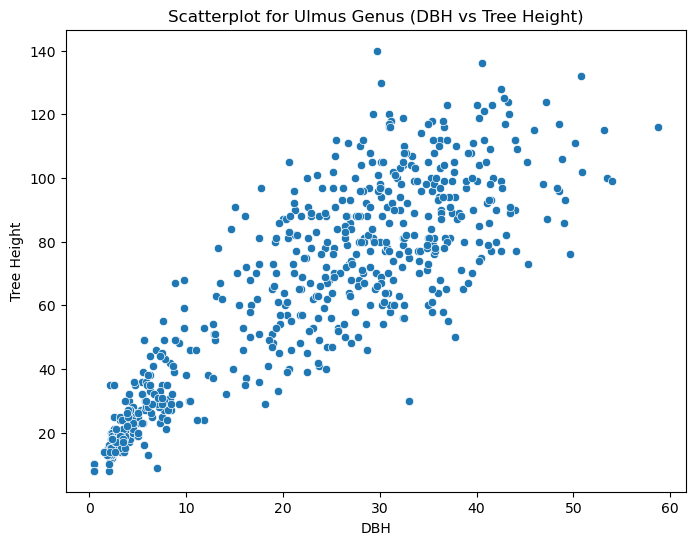

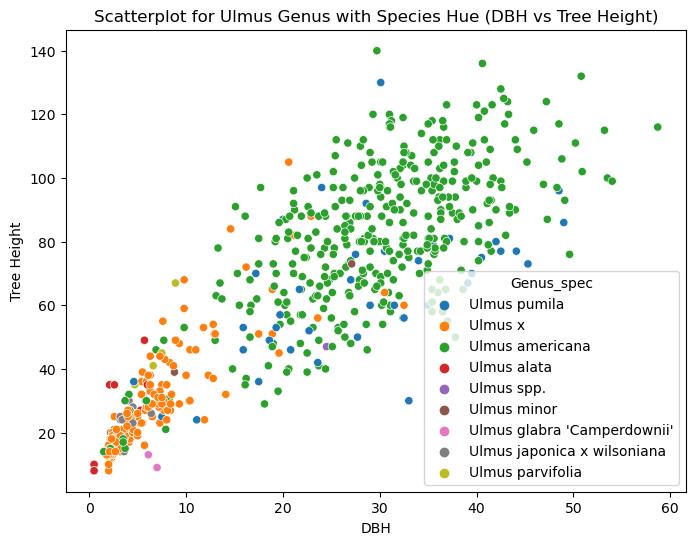

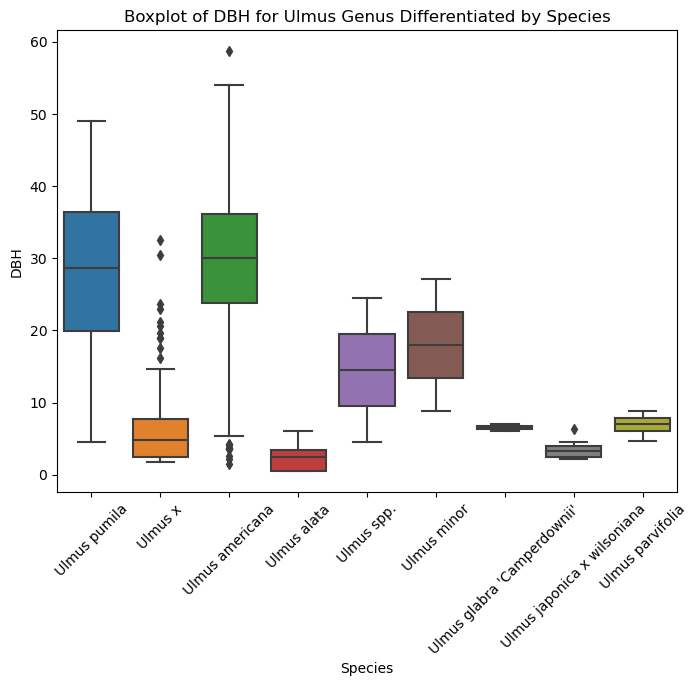

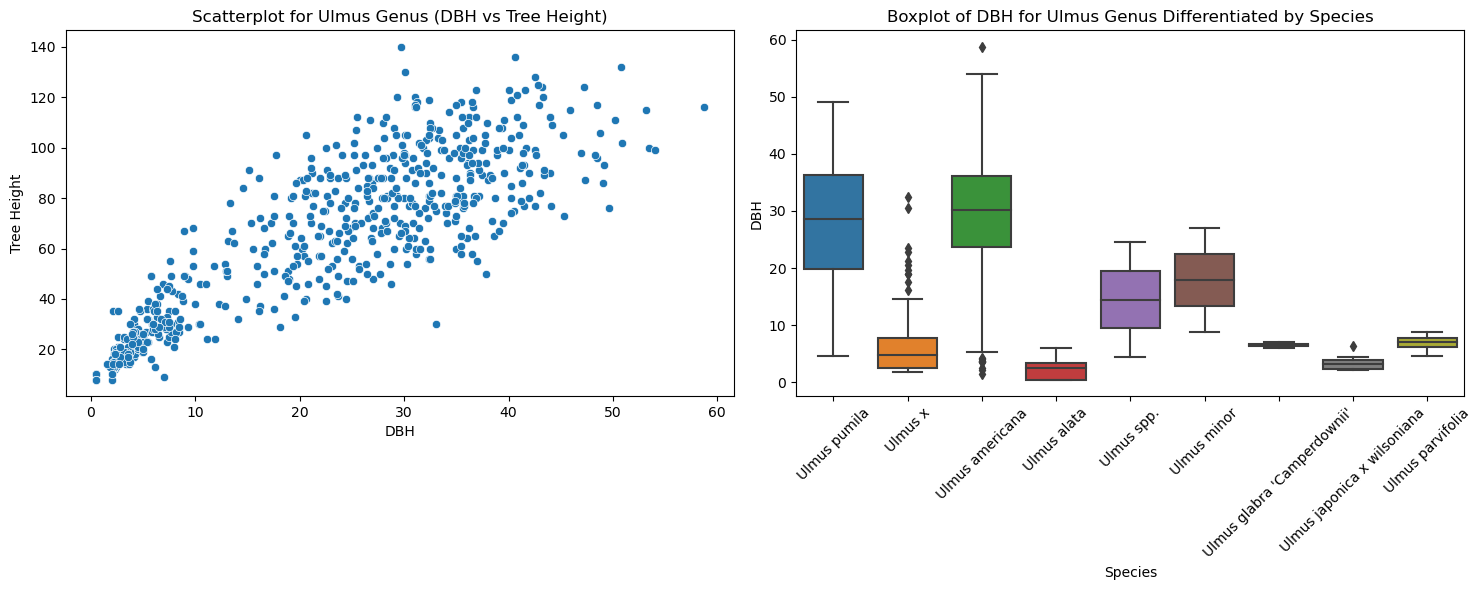

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
trees_df = pd.read_csv('/arcgis/home/portland_park_trees.csv', sep=",", header=0)

# Graph 1: Scatterplot for Ulmus genus (DBH vs Tree Height)
ulmus_data = trees_df[trees_df['Genus'] == 'Ulmus']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ulmus_data, x='DBH', y='TreeHeight')
plt.title('Scatterplot for Ulmus Genus (DBH vs Tree Height)')
plt.xlabel('DBH')
plt.ylabel('Tree Height')
plt.show()

# Graph 2: Scatterplot for Ulmus genus with species as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ulmus_data, x='DBH', y='TreeHeight', hue='Genus_spec')
plt.title('Scatterplot for Ulmus Genus with Species Hue (DBH vs Tree Height)')
plt.xlabel('DBH')
plt.ylabel('Tree Height')
plt.show()

# Graph 3: Boxplot of DBH for Ulmus genus differentiated by species
plt.figure(figsize=(8, 6))
sns.boxplot(data=ulmus_data, x='Genus_spec', y='DBH')
plt.title('Boxplot of DBH for Ulmus Genus Differentiated by Species')
plt.xlabel('Species')
plt.ylabel('DBH')
plt.xticks(rotation=45)
plt.show()

# Graph 4: Combined Graphs 1 and 3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graph 1 on the left
sns.scatterplot(data=ulmus_data, x='DBH', y='TreeHeight', ax=ax1)
ax1.set_title('Scatterplot for Ulmus Genus (DBH vs Tree Height)')
ax1.set_xlabel('DBH')
ax1.set_ylabel('Tree Height')

# Graph 3 on the right
sns.boxplot(data=ulmus_data, x='Genus_spec', y='DBH', ax=ax2)
ax2.set_title('Boxplot of DBH for Ulmus Genus Differentiated by Species')
ax2.set_xlabel('Species')
ax2.set_ylabel('DBH')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Part 4: Python GeoPandas

In [40]:
dataset = '/arcgis/home/DCD_SCOTLAND.shp'

In [41]:
import geopandas as gpd

In [42]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

Note: you may need to restart the kernel to use updated packages.


Task !:

In [43]:
# Load the data

dataset = gpd.read_file('/arcgis/home/DCD_SCOTLAND.shp')

Task 2:

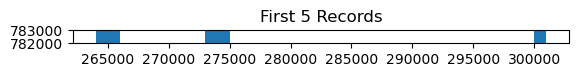

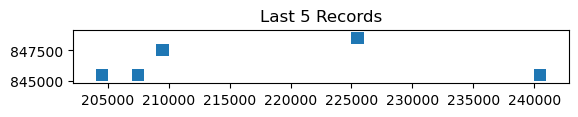

In [44]:
# Plot first 5 records
dataset.head(5).plot()
plt.title('First 5 Records')
plt.show()

# Plot last 5 records
dataset.tail(5).plot()
plt.title('Last 5 Records')
plt.show()

Task 3:

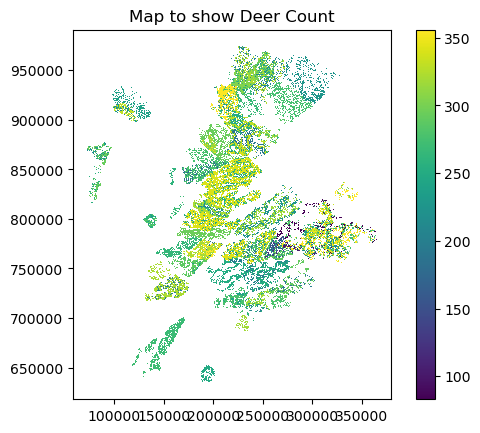

In [45]:
# Replace 'categorical_column' with the categorical attribute you want to visualize
dataset.plot(column='COUNT_ID', legend=True)
plt.title('Map to show Deer Count')
plt.show()

Task 4:

In [46]:
# Check CRS
print("Coordinate Reference System:", dataset.crs)

Coordinate Reference System: epsg:27700


Task 5:

In [47]:
# Count features
num_features = len(dataset)
print("Number of features in the dataset:", num_features)

Number of features in the dataset: 23567


Task 6:

In [48]:
# List unique values in each column to identify categorical attributes
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Column '{column}' has unique values:")
    print(unique_values)
    print("=" * 30)

Column 'UID_' has unique values:
[  321   322   323 ... 21361 21362 21363]
Column 'COUNT_ID' has unique values:
[ 83  84 104 188 126 136 189 191 195 196 190 193 194 192 198 199 197 200
 201 203 214 225 224 204 211 206 233 237 244 205 209 228 212 213 215 216
 248 230 232 234 231 210 235 236 246 250 242 238 222 249 243 240 229 239
 247 241 245 251 227 223 253 256 264 258 265 254 271 269 266 267 257 252
 262 255 272 217 218 270 226 268 288 273 276 292 277 281 282 274 294 295
 275 278 279 304 280 303 293 290 289 259 261 296 260 341 337 336 329 316
 321 322 330 307 317 332 338 319 291 286 283 333 339 284 285 343 352 354
 342 355 353 349 356 350 320 313 315 314 318 344 347]
Column 'SUM_STAGS' has unique values:
[  2.   0.  15.  35.  88.   1.   3.   6.  38.  39.  81.  57.   4.  11.
  14. 323.  48.   7.  32.  68.  40.   9.  65.  21.  10.  85.   8.   5.
 101. 113.  22. 106. 107. 122. 130.  24. 377.  49.  37.  16. 132.  17.
 125.  66.  50.  41. 103.  23.  82. 140.  19.  56.  26.  44.  47.  80.
 

In [49]:
# Replace 'categorical_column' and 'category_value' with your filtering criteria
subset_categorical = dataset[dataset['SUM_HINDS'] == '93']

Task 7:

In [50]:
# Replace 'numerical_column' and 'threshold_value' with your filtering criteria
subset_numerical = dataset[dataset['SUM_HINDS'] > 100]

Task 8:

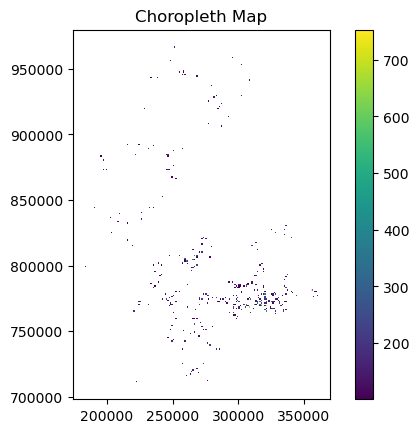

In [51]:
# Replace 'numerical_column' with the numerical attribute for the choropleth map
subset_numerical.plot(column='SUM_HINDS', legend=True)
plt.title('Choropleth Map')
plt.show()

Part 5: Python Rasterrio

In [52]:
pip install earthpy rasterio

Note: you may need to restart the kernel to use updated packages.


Task 1:

In [32]:
dataset = '/arcgis/home/elev.tif'

In [33]:
import rasterio
import matplotlib.pyplot as plt

# Read the raster dataset
file_path = '/arcgis/home/elev.tif'  # Replace with the path to your 'elev.tif' file
dataset = rasterio.open(file_path)

Task 2:

In [34]:
# Get the CRS of the dataset
crs = dataset.crs
print("CRS of the dataset:", crs)

CRS of the dataset: EPSG:32617


Task 3:

In [35]:
# Raster extent (bounds)
bounds = dataset.bounds
print("Raster extent (bounds):", bounds)

# Reference system and number of bands
reference_system = dataset.profile
num_bands = dataset.count
print("Reference system:", reference_system)
print("Number of bands:", num_bands)

Raster extent (bounds): BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
Reference system: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 6303, 'height': 5897, 'count': 1, 'crs': CRS.from_epsg(32617), 'transform': Affine(30.0, 0.0, 479753.39945587853,
       0.0, -30.0, 4347733.203759138), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}
Number of bands: 1


Task 4:

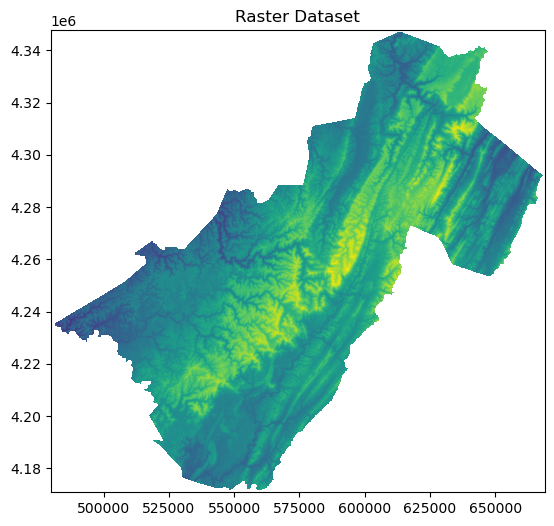

In [37]:
import rasterio
from rasterio.plot import show

# Read the raster dataset
file_path = '/arcgis/home/elev.tif'  
dataset = rasterio.open(file_path)

# Plot the raster dataset
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
show(dataset, ax=ax)
ax.set_title('Raster Dataset')
plt.show()

Task 5:

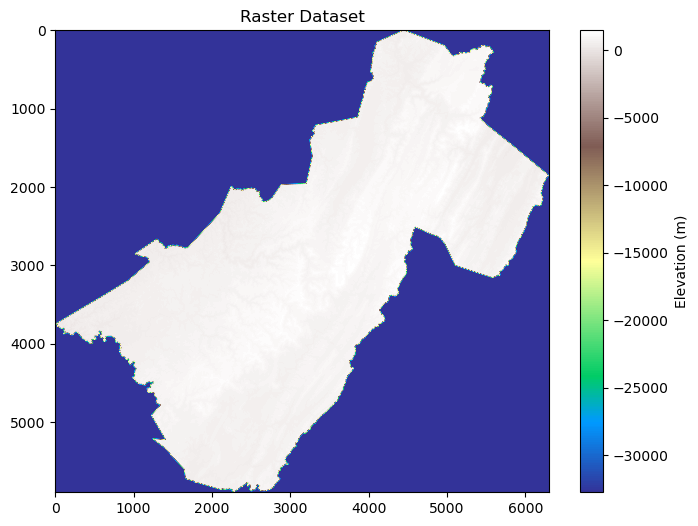

In [114]:
import rasterio
import matplotlib.pyplot as plt

# Read the raster dataset as a NumPy array
file_path = '/arcgis/home/elev.tif'  
with rasterio.open(file_path) as src:
    raster_array = src.read(1)  # Read a specific band (replace with the desired band number)

# Plot the raster dataset using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(raster_array, cmap='terrain')  # Use 'terrain' colormap or any other colormap
plt.colorbar(label='Elevation (m)')
plt.title('Raster Dataset')
plt.show()

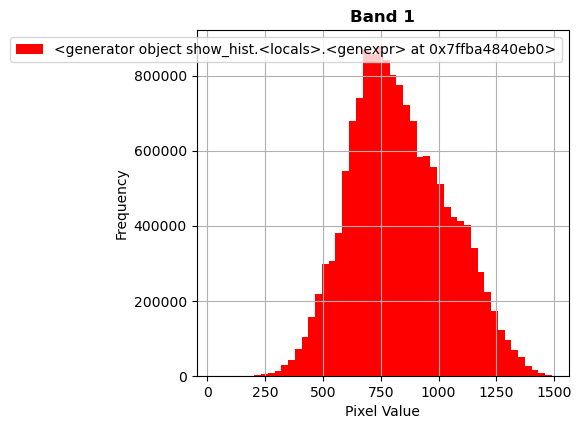

In [39]:
# Create histograms for each band in the raster dataset
plt.figure(figsize=(10, 8))
for i in range(1, dataset.count + 1):
    plt.subplot(2, 2, i)
    rasterio.plot.show_hist(dataset, bins=50, histtype='stepfilled', ax=plt.gca(), title=f'Band {i}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()